# 决策边界

## 决策边界的推导
> 当我们p>0.5时，预测分类为1；小于0.5时，预测分类为0，这也是逻辑回归的核心要义

![决策边界的推导1](images/决策边界的推导1.png)
## 决策边界的含义
![决策边界的含义](images/决策边界的含义.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
X = iris.data
y = iris.target

In [3]:
X[:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
y.shape

(150,)

In [5]:
y[:5]

array([0, 0, 0, 0, 0])

In [6]:
X = X[y<2, :2] # 选取X中对应地y小于2的部分的前两列(即前两个特征)

In [7]:
y = y[y<2]

In [8]:
X.shape

(100, 2)

In [9]:
y.shape

(100,)

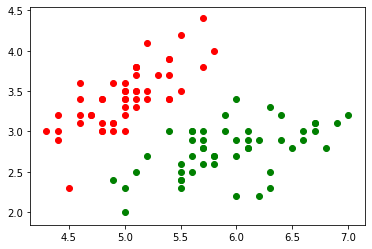

In [10]:
plt.axis('on')
plt.scatter(X[y==0, 0], X[y==0, 1], color='red') # 用前两列即两个特征作为坐标轴的横纵坐标
plt.scatter(X[y==1, 0], X[y==1, 1], color='green')
plt.show()

## 1.使用我们自己实现地逻辑回归算法

In [11]:
from playML.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666) # 默认按照测试集:训练集=8:2来划分地

In [12]:
# 训练逻辑回归的模型
from playML.LogisticRegression import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [13]:
log_reg.score(X_test, y_test) # 预测正确率到了100%

1.0

In [14]:
log_reg.predict_proba(X_test) # 每个元素对应的发生时间1的概率性,根据是否大于0.5决定是1还是0

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [15]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [16]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [17]:
log_reg.coef_ # 系数θ向量

array([ 3.01796521, -5.04447145])

In [18]:
log_reg.intercept_ # 截距

-0.6937719272911228

## 2.绘制出我们上面说地决策边界
![决策边界的含义](images/决策边界的含义.png)

In [19]:
def x2(x1):
    return (-log_reg.intercept_- log_reg.coef_[0] * x1) / log_reg.coef_[1]

In [20]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

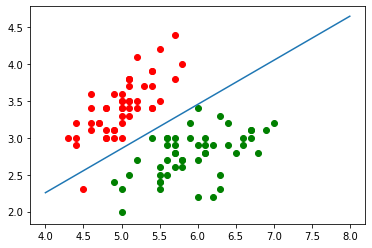

In [22]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='red') # 用前两列即两个特征作为坐标轴的横纵坐标
plt.scatter(X[y==1, 0], X[y==1, 1], color='green') 
plt.plot(x1_plot, x2_plot) # 把逻辑回归的边界画出来
plt.show() # 对全量数据集绘图

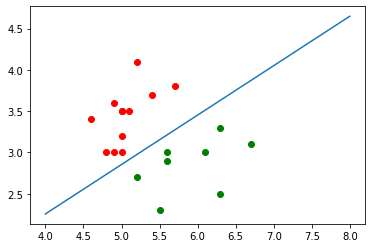

In [24]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color='red') # 用前两列即两个特征作为坐标轴的横纵坐标
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color='green') 
plt.plot(x1_plot, x2_plot) # 把逻辑回归的边界画出来
plt.show() # 对测试数据集绘图

## 绘制全部点的时的边界

In [25]:
def plot_decision_boundary(model, axis):
    """
    根据模型绘制决策边界
    """
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


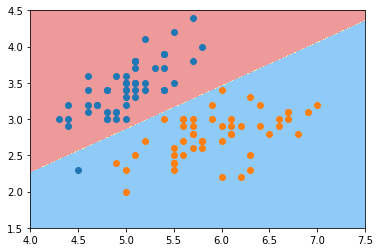

In [26]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1]) # 用前两列即两个特征作为坐标轴的横纵坐标
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

## kNN的决策边界

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
knn_clf.score(X_test, y_test) # 正确率还是100%

1.0

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


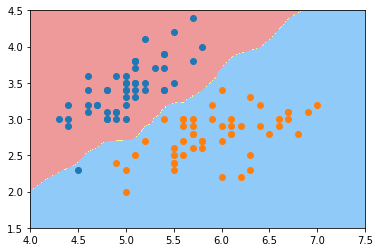

In [30]:
# 虽然kNN的决策边界并不能用数学方法算出来，但是只要有predict算法，我们去足够多的点绘制，边界自然就出来了
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5]) # knn的决策边界也是可以画出来地
plt.scatter(X[y==0, 0], X[y==0, 1]) # 用前两列即两个特征作为坐标轴的横纵坐标
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

## 使用kNN对鸢尾花数据的全量进行分析
> X还是取前两列，方便可视化;但是y取所有，一共分0、1、2三类，下面我们看看决策边界

In [31]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


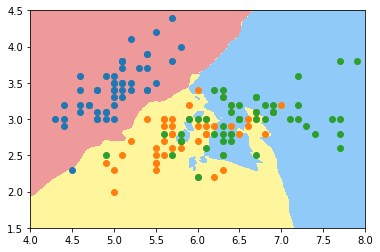

In [33]:
# 虽然kNN的决策边界并不能用数学方法算出来，但是只要有predict算法，我们去足够多的点绘制，边界自然就出来了
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5]) # knn的决策边界也是可以画出来地
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0, 1]) # 用前两列即两个特征作为坐标轴的横纵坐标
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1, 1]) # 用前两列即两个特征作为坐标轴的横纵坐标
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2, 1]) # 用前两列即两个特征作为坐标轴的横纵坐标
plt.show()

In [34]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50) # neignbours变大，决策边界会变得更规则，即过拟合程度降低
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


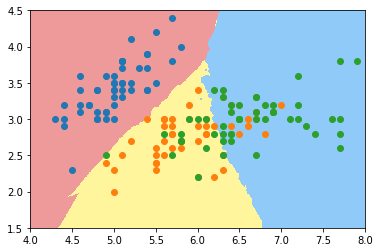

In [35]:
# 虽然kNN的决策边界并不能用数学方法算出来，但是只要有predict算法，我们去足够多的点绘制，边界自然就出来了
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5]) # knn的决策边界也是可以画出来地
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0, 1]) # 用前两列即两个特征作为坐标轴的横纵坐标
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1, 1]) # 用前两列即两个特征作为坐标轴的横纵坐标
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2, 1]) # 用前两列即两个特征作为坐标轴的横纵坐标
plt.show()